In [1]:
from fastai.text.all import *
#from nbdev.showdoc import *

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
train = pd.read_csv('../sst5/train/train_sst5.csv')
train.head()

,sentence,label
0,"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",3
1,The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,4
2,"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",3
3,You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,2
4,Yet the act is still charming here .,3


In [3]:
train["is_valid"] = [False for i in range(len(train))]
train

,sentence,label,is_valid
0,"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",3,False
1,The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,4,False
2,"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",3,False
3,You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,2,False
4,Yet the act is still charming here .,3,False
...,...,...,...
8539,A real snooze .,0,False
8540,No surprises .,1,False
8541,"We 've seen the hippie-turned-yuppie plot before , but there 's an enthusiastic charm in Fire that makes the formula fresh again .",3,False
8542,"Her fans walked out muttering words like `` horrible '' and `` terrible , '' but had so much fun dissing the film that they did n't mind the ticket cost .",0,False


In [4]:
val = pd.read_csv('../sst5/val/val_sst5.csv')
val["is_valid"] = [True for i in range(len(val))]
val

,sentence,label,is_valid
0,It 's a lovely film with lovely performances by Buy and Accorsi .,3,True
1,"No one goes unindicted here , which is probably for the best .",2,True
2,"And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins .",3,True
3,"A warm , funny , engaging film .",4,True
4,"Uses sharp humor and insight into human nature to examine class conflict , adolescent yearning , the roots of friendship and sexual identity .",4,True
...,...,...,...
1096,it seems to me the film is about the art of ripping people off without ever letting them consciously know you have done so,1,True
1097,"It 's just disappointingly superficial -- a movie that has all the elements necessary to be a fascinating , involving character study , but never does more than scratch the surface .",1,True
1098,"The title not only describes its main characters , but the lazy people behind the camera as well .",1,True
1099,"Sometimes it feels as if it might have been made in the '70s or '80s , and starred Chevy Chase and Goldie Hawn .",2,True


In [5]:
df = pd.concat((train,val), axis = 0)
df.index = [i for i in range(len(df))]
df

,sentence,label,is_valid
0,"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",3,False
1,The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,4,False
2,"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",3,False
3,You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,2,False
4,Yet the act is still charming here .,3,False
...,...,...,...
9640,it seems to me the film is about the art of ripping people off without ever letting them consciously know you have done so,1,True
9641,"It 's just disappointingly superficial -- a movie that has all the elements necessary to be a fascinating , involving character study , but never does more than scratch the surface .",1,True
9642,"The title not only describes its main characters , but the lazy people behind the camera as well .",1,True
9643,"Sometimes it feels as if it might have been made in the '70s or '80s , and starred Chevy Chase and Goldie Hawn .",2,True


In [6]:
dbunch_lm = TextDataLoaders.from_df(
    df, 
    text_col='sentence', 
    label_col='label',
    path='../sst5/',
    is_lm=True,
    valid_col='is_valid'
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [7]:
bs = 128

In [8]:
learn = language_model_learner(dbunch_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\autocast_mode.py:120: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.0063095735386013985)

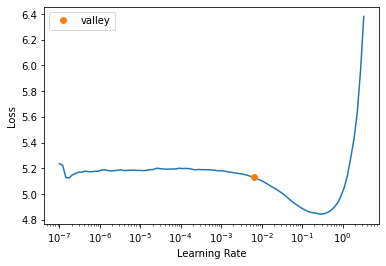

In [9]:
learn.lr_find()

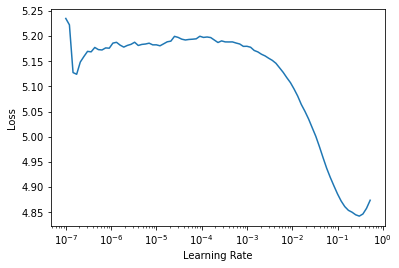

In [10]:
learn.recorder.plot_lr_find(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7,0.8))


D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.214406,3.899059,0.328297,49.355988,02:25


In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(2, 2e-2, moms=(0.8,0.7,0.8))

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.215656,4.199110,0.291224,66.626976,04:48
1,3.783650,3.961867,0.323586,52.555359,04:46


In [14]:
test = pd.read_csv('../sst5/test/test_sst5.csv')
test

,sentence,label
0,Effective but too-tepid biopic,2
1,"If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .",3
2,"Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel like one .",4
3,The film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .,2
4,Offers that rare combination of entertainment and education .,4
...,...,...
2205,An imaginative comedy\/thriller .,3
2206,"( A ) rare , beautiful film .",4
2207,( An ) hilarious romantic comedy .,4
2208,Never ( sinks ) into exploitation .,3


In [15]:
learn.save('fine_tuned_enc')

Path('../sst5/models/fine_tuned_enc.pth')

In [16]:
len(dbunch_lm.vocab)

6216

In [17]:
def read_tokenized_file(f): return L(f.read_text().split(' '))

In [21]:
max(max(train.sentence.str.split().str.len().max(), val.sentence.str.split().str.len().max()), test.sentence.str.split().str.len().max())

56

In [22]:
dbunch_clas = TextDataLoaders.from_df(
    df, 
    text_col='sentence', 
    label_col='label',
    path='../sst5/',
    seq_len = 56,
    valid_col='is_valid',
    get_x=read_tokenized_file,
    get_y = parent_label
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [24]:
learn = text_classifier_learner(dbunch_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()
#learn.load_encoder('fine_tuned_enc')

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.00363078061491251)

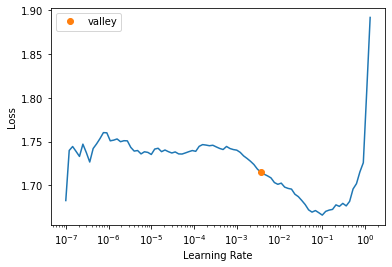

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7,0.8))

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.474939,1.374987,0.396004,01:30


In [27]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-2, moms=(0.8,0.7,0.8))

D:\Anaconda_python\envs\BERTXLNET\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.316519,1.669458,0.297003,05:08
1,1.363300,1.745868,0.269755,05:05
2,1.337892,100.577484,0.227066,05:14
3,1.279317,379.392731,0.260672,06:04
4,1.244849,1247.983887,0.160763,06:37
5,1.186753,6.610372,0.373297,06:41
6,1.114430,1.816833,0.393279,06:09
7,1.064604,15.048463,0.378747,05:55
8,1.024400,71.334023,0.355132,05:54
9,0.992190,67.784546,0.356948,05:56


In [33]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

res_pred = []
for text in test['sentence']:
    res_pred.append(int(learn.predict(text)[0]))
res_pred

[0,
 3,
 2,
 1,
 0,
 1,
 2,
 0,
 4,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 0,
 3,
 3,
 0,
 4,
 3,
 3,
 3,
 0,
 3,
 2,
 1,
 1,
 2,
 4,
 0,
 1,
 3,
 4,
 4,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 2,
 2,
 4,
 4,
 0,
 1,
 0,
 1,
 2,
 4,
 3,
 1,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 1,
 0,
 4,
 4,
 3,
 3,
 1,
 0,
 1,
 2,
 1,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 0,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 4,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 0,
 2,
 3,
 2,
 3,
 0,
 3,
 0,
 1,
 3,
 4,
 4,
 3,
 3,
 2,
 0,
 3,
 1,
 4,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 0,
 3,
 2,
 2,
 4,
 4,
 1,
 4,
 3,
 3,
 3,
 2,
 0,
 4,
 3,
 3,
 1,
 3,
 3,
 0,
 1,
 4,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 4,
 4,
 0,
 3,
 4,
 1,
 0,
 0,
 3,
 2,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 0,
 2,
 1,
 4,
 3,
 2,
 1,
 0,
 3,
 1,
 4,
 2,
 0,
 2,
 1,
 4,
 3,
 3,
 0,
 3,
 3,
 0,
 4,
 2,
 3,
 0,
 2,
 3,
 3,
 1,
 0,
 3,
 4,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 1,


In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(res_pred, test['label'])

0.34796380090497736